In [1]:
# Import PyTorch
!pip install torch
!pip install torchvision


In [2]:
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0
torchvision version: 0.21.0


In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images (you can change dimensions as needed)
    transforms.ToTensor(),       
    transforms.Normalize((0.5,), (0.5,))  
])

# Use ImageFolder to load the dataset
dataset = datasets.ImageFolder(
    root="data",  # Path to the folder containing A, B, C
    transform=transform
)

from torch.utils.data import random_split

print(len(dataset))
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_data, test_data = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print("Class-to-Index Mapping:", dataset.class_to_idx)

206137
Class-to-Index Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [4]:
print(f"Dataloaders: {train_loader, test_loader}") 
print(f"Length of train dataloader: {len(train_loader)} batches of {32}")
print(f"Length of test dataloader: {len(test_loader)} batches of {32}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x1075e3e50>, <torch.utils.data.dataloader.DataLoader object at 0x1075fd420>)
Length of train dataloader: 5154 batches of 32
Length of test dataloader: 1289 batches of 32


In [5]:
image, label = train_data[0]
image, label

(tensor([[[-0.4510, -0.3333, -0.3412,  ..., -0.5608, -0.5608, -0.5765],
          [-0.1216,  0.0902,  0.0588,  ..., -0.3020, -0.3176, -0.4118],
          [-0.0902,  0.1529,  0.1529,  ...,  0.0353, -0.0118, -0.1373],
          ...,
          [-0.5216, -0.3412, -0.3255,  ..., -0.1765, -0.1686, -0.2392],
          [-0.6157, -0.5922, -0.5294,  ..., -0.1686, -0.1686, -0.2392],
          [-0.8588, -0.8196, -0.7882,  ..., -0.2314, -0.2392, -0.3098]],
 
         [[-0.3804, -0.2471, -0.2627,  ..., -0.6235, -0.6235, -0.6471],
          [ 0.0667,  0.3255,  0.2863,  ..., -0.4196, -0.4510, -0.5294],
          [ 0.1451,  0.4353,  0.4275,  ..., -0.0431, -0.0980, -0.2392],
          ...,
          [-0.4353, -0.2863, -0.3020,  ..., -0.1922, -0.2000, -0.2706],
          [-0.4745, -0.4902, -0.5059,  ..., -0.1843, -0.1765, -0.2549],
          [-0.8353, -0.8196, -0.7882,  ..., -0.2549, -0.2471, -0.3176]],
 
         [[ 0.3490,  0.1451,  0.1216,  ..., -0.1686, -0.1843, -0.0745],
          [ 0.4667,  0.2863,

In [6]:
image.shape

torch.Size([3, 28, 28])

In [7]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [8]:
!pip install matplotlib

In [9]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.8980392].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8901961..0.7176471].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..0.8901961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7490196..0.5137255].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9137255..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.8980392].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.929

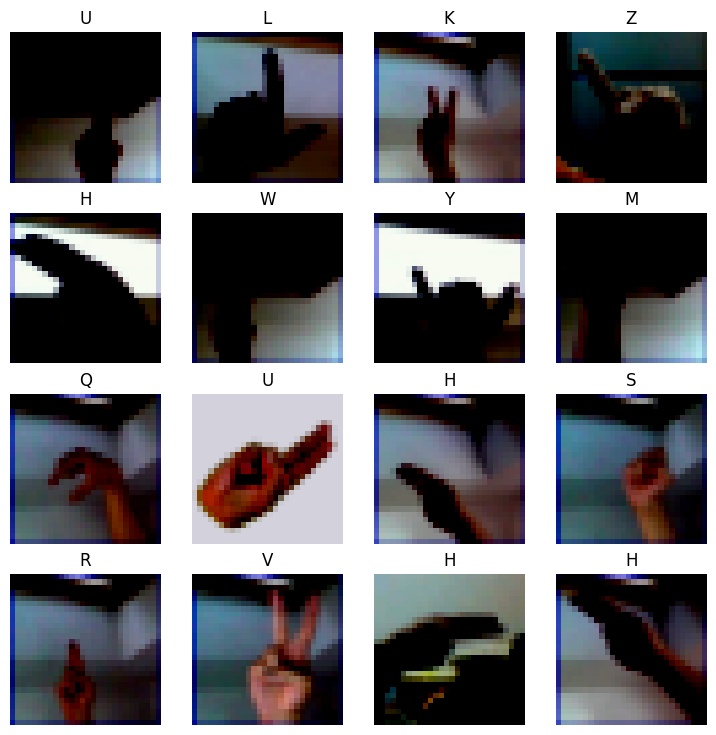

In [10]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    img = img.permute(1, 2, 0)  # Rearrange dimensions to (height, width, channels)
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)  
    plt.title(dataset.classes[label])  
    plt.axis(False)
plt.show()

In [11]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 3, 28, 28]), torch.Size([32]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81960785..0.88235295].


Image size: torch.Size([28, 28, 3])
Label: 25, label size: torch.Size([])


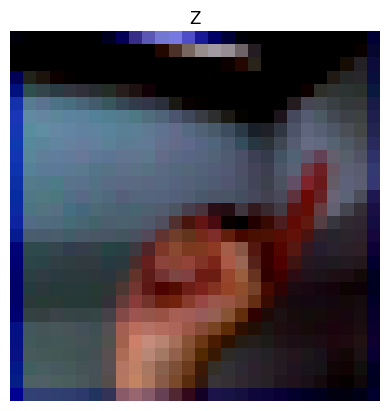

In [12]:
# Show a sample
torch.manual_seed(39)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
img = img.permute(1, 2, 0)  # Rearrange dimensions to (height, width, channels)
plt.imshow(img)
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [14]:
# Create a convolutional neural network 
class ASLModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*49, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        
        x = self.block_2(x)
      
        x = self.classifier(x)

        return x

torch.manual_seed(42)
model_0 = ASLModel(input_shape=3, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_0

ASLModel(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=26, bias=True)
  )
)

In [15]:
model_0(image.unsqueeze(0).to(device))

tensor([[-0.0122,  0.0083, -0.0228,  0.0058, -0.0160, -0.0047, -0.0030,  0.0489,
          0.0068, -0.0137,  0.0423, -0.0519, -0.0737, -0.0863, -0.0380, -0.0726,
         -0.0415, -0.0059,  0.0483,  0.0202, -0.0044,  0.0183,  0.0347, -0.0416,
          0.0230,  0.0620]], grad_fn=<AddmmBackward0>)

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                             lr=0.1)

In [17]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    

In [18]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [19]:
def accuracy_fn(y_true, y_pred):

    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
def print_train_time(start, end, device=None):

    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in (range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader, 
        model=model_0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_loader,
        model=model_0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

Epoch: 0
---------
Train loss: 1.41834 | Train accuracy: 57.97%
Test loss: 0.94809 | Test accuracy: 72.12%

Epoch: 1
---------
Train loss: 0.61499 | Train accuracy: 81.31%
Test loss: 0.50763 | Test accuracy: 84.18%

Epoch: 2
---------
Train loss: 0.51556 | Train accuracy: 84.38%
Test loss: 0.42241 | Test accuracy: 87.52%


Train time on cpu: 857.229 seconds


In [22]:
import os

# Define the folder to save the model
save_dir = "Model"
os.makedirs(save_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Save the model after training
model_path = os.path.join(save_dir, "ASLModels.pth")  # Save as "ASLModel.pth"
torch.save(model_0.state_dict(), model_path)
print(f"Model saved to {model_path}")

Model saved to Model/ASLModels.pth
